#### จัดทำโดย  
นาย อนุ  ม่วงคำ รหัสนักศึกษา 61070327  สาขา วิทยาการข้อมูลและการวิเคราะห์เชิงธุรกิจ

# Task 1: API Chosen

In [2]:
#pip install style
#pip install plotly==4.11.0

  
  ข้อมูลการค้าผ่านแดน-ชายแดน เป็นข้อมูลที่เกี่ยวข้องกับการค้าขายไปยังประเทศที่อยู่ใกล้เคียงกับไทย   การค้าผ่านแดน-ชายแดนจะเป็นข้อมูลแสดงการค้าขายจากไทยผ่านช่องทางประเทศเพื่อนบ้านเพื่อไปสู่ประเทศปลายทางใน 7 ประเทศนี้ โดยข้อมูลการค้าผ่านแดน-ชายแดน จะแสดงให้เห็นถึงสถานภาพทางการค้า ความสัมพันธ์ และความต้องการต่าง ๆ ในกลุ่มประเทศที่ใกล้กับไทย ซึ่งเริ่มตั้งแต่ 2017-2019 และรูปแบบการค้าจะแบ่งออกเป็น 2 ลักษณะ 
#### 1. การค้าผ่านทางเรือ                
  - สิงค์โปร์ 
  - จีนตอนใต้ 
  - เวียดนาม  
  
#### 2. การค้าผ่านทางบก
  - กัมพูชา
  - ลาว
  - เมียนมา
  - มาเลเซีย


- API การค้าผ่านทางเรือ : https://data.moc.go.th/OpenData/BorderTransit
- API การค้าผ่านทางบก : https://data.moc.go.th/OpenData/BorderTrades

## Import Packages Etc.

In [1]:
import urllib
import urllib.request
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plot
from pandas.io.json import json_normalize
import style
import plotly.express as px
from IPython.display import HTML, display
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
init_notebook_mode(connected=True)
plt.rcParams['font.family']='Tahoma'


# Task 2: Collect data from chosen API(s)
ขั้นตอนที่ 2 จะเป็นการดึงข้อมูลจาก API เข้ามาเก็บไว้ในไฟล์ CSV เพื่อใช้ในการแก้ไขและวิเคราะห์ข้อมูลต่อไป 
- โดยจะแบ่งออกเป็น 3 ฟังชัน
  -  calldata_api   &emsp;&emsp;&nbsp;&nbsp; เป็นฟังชั่นการดึงข้อมูล api จากเว็บไซต์มาเก็บไว้ในตัวแปร 
  -  createdataframe &emsp;เป็นฟังชั่นในการนำข้อมูลที่ดึงมาจาก api มาสร้างเป็น DataFrame
  -  dataframe_to_csv &ensp;เป็นฟังชั่นในการนำ DataFrame มาบันทึกลง CSV

In [6]:

box_data = []
box_normalize = []
def calldata_api(box_data,box_normalize):
#ขั้นตอนการดึงข้อมูลจาก APi  ขั้นตอนแรกจะเริ่มจาก การประกาศตัวแปรต่างๆ
#เช่น เดือน(month) ประเภทการนำสินค้าเข้า(channel) รหัสประเทศค้าขายทางเรือ(code) รหัสประเทศค้าขายทางบก(code_1) ซึงตัวแปรเหล่านี้จะใช้ในการดึง Api
    
    month = ["1","2","3","4","5","6","7","8","9","10","11","12"]
    channel = ['import','export']
    code_boat = ["CN","SG","VN"]
    code_land = ['KH','LA','MM','MY']
    year = ["2017","2018","2019"]
    #ขั้นตอนที่ 2 จะเป็นการวนลูปเข้าไปในแต่ละตัวแปร เพื่อใช้ในการ fliter ข้อมูลของ api โดยจะแบ่งเป็น 2 loop ใหญ่ ๆ
    #loop ที่ 1 จะเป็นการลูปดึงข้อมูลของประเทศที่ค้าขายผ่านทางเรือ 
    for channel_ in channel:
        for year_ in year:
            for code_boat_ in code_boat:
                for month_ in month:
                    url = "https://dataapi.moc.go.th/border-transit?trade_type="+channel_+"&country_code="\
                        +code_boat_+"&year="+year_+"&month="+str(month_)+"&limit=&offset="
                    response = urllib.request.urlopen(url)
                    raw_json = response.read().decode("utf-8")
                    data = json.loads(raw_json) #เมื่อดึงข้อมูลได้เป็นข้อมูลดิบแล้ว จะทำการแปลงชนิดข้อมูลเป็น Json
                    box_data.append(data) #จากนั้นนำข้อมูล json ที่ได้มาเก็บไว้ใน list ที่ชื่อ box_data
                    
    #loop ที่ 2 จะเป็นการลูปดึงข้อมูลของประเทศที่ค้าขายผ่านทางบก
    #ซึงการทำงานของ loop ที่ 2 จะเหมือนกับ loop ที่ 1 โดยเปลี่ยนเฉพาะรหัสประเทศ(code_boat to code_land) และเปลี่ยนลิ้ง api
    # จาก /border-transit  เป็น  /border-trades
    for channel_ in channel:
        for year_ in year:                
            for code_land_ in code_land:
                for month_ in month:
                            url =  "https://dataapi.moc.go.th/border-trades?trade_type="+channel_+"&country_code="\
                                +code_land_+"&year="+year_+"&month="+str(month_)+"&limit=&offset="
                            response = urllib.request.urlopen(url)
                            raw_json = response.read().decode("utf-8")
                            data = json.loads(raw_json)
                            box_data.append(data)

#เมื่อเราได้ข้อมูลข้อมูลที่ดึงมาจาก api แล้ว และข้อมูลถูกเก็บไว้ใน list ที่ชื่อ box_data
#ขั้นตอนต่อมาจะเป็นการนำข้อมูลที่ดึงมา  มาสร้างเป็น Dataframe
def createdataframe(box_data,box_normalize):
    #ในการสร้าง Dataframe จะทำการเข้าถึง index เนื่องจากใน box_data จะเป็นข้อมูลทีประกอบด้วย list  list object
#จึงทำการท่องเข้าใน  box_data.ให้เหลือเพียง object ของแต่ละอัน จึงใช้ loop วนเพื่อเข้าถึง index
    for i in range(len(box_data)):
        box_normalize+=box_data[i]
    data = json_normalize(box_normalize)
    return data
#หลังจากเราได้สร้าง DataFrame แล้ว ขั้นตอนต่อมาจะเป็นการบันทึก dataframe to csv
def dataframe_to_csv(data):
    #โดยในการบันทึก Data frame เป็น csv จะใช้คำสั่ง to_csv
    data.to_csv('Data\data.csv', encoding='utf-8-sig', index=False)
    

# Task 3. Parse the collected data, and store it in an appropriate file format
ขั้นตอนที่ 3 จะทำการการแปลงข้อมูลจาก api ให้เป็น DataFrame จากนั้นบันทึกลง CSV โดยผ่านการทำงานทั้งหมดดังนี้

In [8]:
calldata_api(box_data,box_normalize) #ดึง api
createdataframe(box_data,box_normalize).head() #สร้าง dataframe
dataframe_to_csv(createdataframe(box_data,box_normalize)) # บันทึกลง csv

<ipython-input-6-3cf45b197f3b>:46: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead



year  month    type                               port_name province_name  \
0  2017      1  import  รพท.มุกดาหารลานทอง ด่านศุลกากรมุกดาหาร      มุกดาหาร   
1  2017      1  import  รพท.มุกดาหารลานทอง ด่านศุลกากรมุกดาหาร      มุกดาหาร   
2  2017      1  import                 ด่านศุลกากรสะเดา (ศภ.4)         สงขลา   
3  2017      1  import  รพท.มุกดาหารลานทอง ด่านศุลกากรมุกดาหาร      มุกดาหาร   
4  2017      1  import                ด่านศุลกากรนครพนม (ศภ.2)        นครพนม   

  country_code country_name_en               country_name_th  \
0           CN           CHINA  สาธารณรัฐประชาชนจีน (ตอนใต้)   
1           CN           CHINA  สาธารณรัฐประชาชนจีน (ตอนใต้)   
2           CN           CHINA  สาธารณรัฐประชาชนจีน (ตอนใต้)   
3           CN           CHINA  สาธารณรัฐประชาชนจีน (ตอนใต้)   
4           CN           CHINA  สาธารณรัฐประชาชนจีน (ตอนใต้)   

                    product_name  value_baht  
0        กรอบและโครงสำหรับแว่นตา      2570.0  
1        กรอบและโครงสำหรับแว่นตา     12989.0  
2  กระจก แก้ว และผลิตภัณฑ์อื่น ๆ      2696.0  
3  กระจก แก้ว และผลิตภัณฑ์อื่น ๆ      2843.0  
4  กระจก แก้ว และผลิตภัณฑ์อื่น ๆ      5366.0

# Task 4: Load and represent the data 
ขั้นตอนที่ 4 จะเป็นการโหลดข้อมูลที่เซฟไว้ของเป็น CSV ขึ้นมาใช้งาน โดยขั้นตอนนี้จะรวมไปถึงการทำ Cleaning ข้อมูลและสำรวจข้อมูลภายใน 

In [2]:
data_trade = pd.read_csv("Data\data.csv",index_col= ['country_code','year','month'])
data_trade.head()

type                               port_name  \
country_code year month                                                   
CN           2017 1      import  รพท.มุกดาหารลานทอง ด่านศุลกากรมุกดาหาร   
                  1      import  รพท.มุกดาหารลานทอง ด่านศุลกากรมุกดาหาร   
                  1      import                 ด่านศุลกากรสะเดา (ศภ.4)   
                  1      import  รพท.มุกดาหารลานทอง ด่านศุลกากรมุกดาหาร   
                  1      import                ด่านศุลกากรนครพนม (ศภ.2)   

                        province_name country_name_en  \
country_code year month                                 
CN           2017 1          มุกดาหาร           CHINA   
                  1          มุกดาหาร           CHINA   
                  1             สงขลา           CHINA   
                  1          มุกดาหาร           CHINA   
                  1            นครพนม           CHINA   

                                      country_name_th  \
country_code year month                                 
CN           2017 1      สาธารณรัฐประชาชนจีน (ตอนใต้)   
                  1      สาธารณรัฐประชาชนจีน (ตอนใต้)   
                  1      สาธารณรัฐประชาชนจีน (ตอนใต้)   
                  1      สาธารณรัฐประชาชนจีน (ตอนใต้)   
                  1      สาธารณรัฐประชาชนจีน (ตอนใต้)   

                                          product_name  value_baht  
country_code year month                                             
CN           2017 1            กรอบและโครงสำหรับแว่นตา      2570.0  
                  1            กรอบและโครงสำหรับแว่นตา     12989.0  
                  1      กระจก แก้ว และผลิตภัณฑ์อื่น ๆ      2696.0  
                  1      กระจก แก้ว และผลิตภัณฑ์อื่น ๆ      2843.0  
                  1      กระจก แก้ว และผลิตภัณฑ์อื่น ๆ      5366.0

In [3]:
data_trade.dtypes # การแสดงชนิดข้อมูลของแต่ละ column

type                object
port_name           object
province_name       object
country_name_en     object
country_name_th     object
product_name        object
value_baht         float64
dtype: object

In [4]:
data_trade.shape  #เป็นการแสดงมิติของข้อมูล ซึ่งข้อมูลมีทั้งหมด 201060 row และมี 7 column

(20160, 7)

In [5]:
data_trade.describe() #สถิติอธิบาย

value_baht
count  2.016000e+04
mean   2.420919e+07
std    3.659115e+08
min    0.000000e+00
25%    1.073175e+04
50%    7.021550e+04
75%    5.492298e+05
max    7.603658e+09

## Handling Missing Values
ขั้นตอนนี้จะเป็นการจะการกับค่า null ของข้อมูล

In [6]:
data_trade.isnull().sum()

type               0
port_name          0
province_name      0
country_name_en    0
country_name_th    0
product_name       0
value_baht         0
dtype: int64

จากผลลัพธ์ด้านบน พบว่าข้อมูลไม่มีค่า null จึงเริ่มทำการวิเคราห์ต่อในขั้นตอนต่อไหป

## Check Spelling of a Word
จะเป็นขั้นตอนการเช็คคำ เนื่องจากข้อมูลที่ได้รับมามีชื่อสินค้าบางรายการ ตัวสระตกขาดหายไป จึงทำการแก้ไขดังขั้นตอนต่อไปนี้

In [7]:
data_trade[data_trade.product_name.str.contains('ครื่องจักรกล')].product_name.value_counts() #เช็คคำ

เครื่องจักรกลอื่น ๆ และส่วนประกอบ    188
ครื่องจักรกลและส่วนประกอบ อื่น ๆ      78
Name: product_name, dtype: int64

จากการตรวจสอบคำพบว่า มีการสระหาย และเนื่องจาก 2 ประโยคนี้มีความหมายเหมือนกัน จะทำการตั้งชื่อรวมเข้าด้วยกัน

In [8]:
#ทำการแก้ไขคำด้วยการกำหนดเงื่อนไขใน .loc และ ค่าใหม่ลงไป
data_trade.loc[data_trade['product_name'] == 'ครื่องจักรกลและส่วนประกอบ อื่น ๆ' , 'product_name'] = 'เครื่องจักรกลอื่น ๆ และส่วนประกอบ'

In [9]:
data_trade[data_trade.product_name.str.contains('ครื่องจักรกล')].product_name.value_counts() #ตรวจสอบผลลัพธ์

เครื่องจักรกลอื่น ๆ และส่วนประกอบ    266
Name: product_name, dtype: int64

In [10]:
data_trade[data_trade.product_name.str.contains('ครื่องแต่งกายและเข็มขัด')].product_name.value_counts()#เช็คคำ

ครื่องแต่งกายและเข็มขัด    14
Name: product_name, dtype: int64

In [11]:
data_trade.loc[data_trade['product_name'] == 'ครื่องแต่งกายและเข็มขัด' , 'product_name'] = 'เครื่องแต่งกายและเข็มขัด' #แก้ไขคำ
data_trade[data_trade.product_name.str.contains('ครื่องแต่งกายและเข็มขัด')].product_name.value_counts() #แสดงผลลัพธ์

เครื่องแต่งกายและเข็มขัด    14
Name: product_name, dtype: int64

# Task 5: Analyse and Conclusion

## วิเคราะห์กระแสเงินหมุนเวียน
เป็นกาวิเคราะห์ภาพรวมการไหลของกระแสเงินของประเทศไทย เพื่อแสดงภาพรวมเงินเข้าออกประเทศของไทยในการค้าขายผ่านแดน-ชายแดน ซึ่งจากราฟด้านล่างแสดงให้เห็นว่าใน 2019 นั้นมีเงินหมุนเวียนเข้าประเทศเยอะที่สุดจากการค้าข้ามแดน-ชายแดน โดยจำนวนเงินส่วนใหญ่มาจากสินค้านำเข้าของประเทศ

In [12]:
#เป็นกร่าฟแสดงเงินเข้าออกจากประเทศไทย จากการค้าขายกับเพื่อนบ้านโดยจะแสดงยอดขายทั้งปีและประเภทของการขาย
#ซึ่งขั้นตอนมีดังนี้ 

data_circulat = (data_trade.groupby(by=['year','type']).sum()/1000000) #ขั้นตอนแรกจะเริ่มจากรวมกลุ่มข้อมูลโดยจะกรุ๊ปตามปี
#และประเภทการขายหลังจากนั้นทำการหารด้วยหนึ่งล้าน เพื่อแปลงหน่วยเป็นล้าน 

data_circulat

value_baht
year type                 
2017 export    6238.267528
     import  134988.973810
2018 export    7994.775342
     import  156871.712590
2019 export   19724.963064
     import  162238.557558

In [13]:
#ขั้นตอนต่อมา นำ dataframe ที่สร้างไว้มาสร้างเป็น dict เนื่องจากต้องการแสดงในรูปแบบ bar stack
data_plot = {"Export":[data_circulat.loc[2017,'export'][0],data_circulat.loc[2018,'export'][0],
                       data_circulat.loc[2019,'export'][0]],#ซึ่ง dict ที่มี keyเป็น export จะมีค่าเป็นlist ที่เก็บยอดขายส่งออกของแต่ละปี
            "Import":[data_circulat.loc[2017,'import'][0],data_circulat.loc[2018,'import'][0],
                      data_circulat.loc[2019,'import'][0]]}#และ key เป็น import จะมีค่าเป็น list ที่เก็บยอดขายนำเข้าของแต่ละปี
dataframe = pd.DataFrame(data=data_plot ,index = [2017,2018,2019]) #จากนั้น นำdict ที่สร้างไว้มาสร้างเป็น dataframe
dataframe

Export         Import
2017   6238.267528  134988.973810
2018   7994.775342  156871.712590
2019  19724.963064  162238.557558

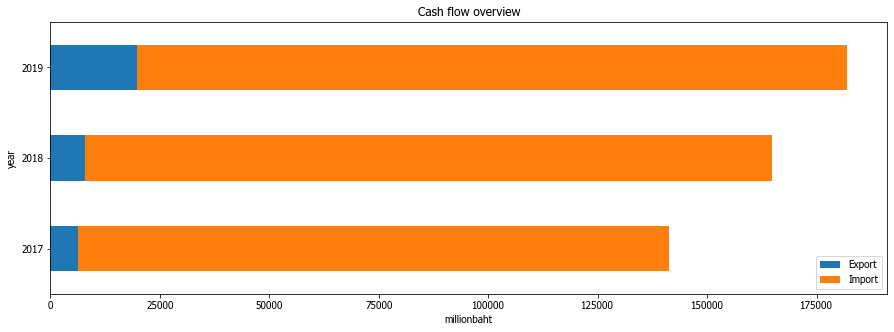

In [14]:
#และขั้นตอนสุดท้ายจะเป็นการนำ dataframe ที่สร้างไว้มา plot แสดงผลดังรูปด้านล่าง
index = ["2017","2018","2019"]
dataframe.plot.barh(stacked=True ,title = 'Cash flow overview',figsize=(15, 5) )
plt.xlabel('millionbaht')
plt.ylabel('year')
plt.show()

## การวิเคราะห์สัดส่วนตามประเภทการขนส่ง


### การแสดงสัดส่วนการค้าข้ามแดนผ่านทางเรือ
การแสดงผลด้านล่างจะเป็นการแสดงสัดส่วนการค้าข้ามแดนโดยผ่านเรือของแต่ละปี โดยจะแสดงอยู่ในรูปแบบของเปอร์เซ็น  
จะประกอบไปด้วยประเทศดังนี้


   - CHINA
   - VIETNAM
   - SINGAPORE

In [15]:
#pie chart แสดงสัดส่วนการค้าข้ามแดนทางเรือ โดยขั้นตอนแรกจะเริ่มจากการ filterข้อมูลประเทศที่มีการค้าผ่านทางเรือ หลังจากนั้นทำการกรุ๊ปตามประเทศและปี
data_boat = data_trade.loc[['CN','SG','VN']].groupby(by=['country_code','year'])
data_boat = data_boat.sum()/1000000 #ต่อมาทำการแปลงหน่วยของข้อมูลให้เป็นหนึ่งล้าน โดยการนำหนึ่งล้านไปหารข้อมูล
data_boat

value_baht
country_code year              
CN           2017   4719.206680
             2018   6677.046568
             2019  18802.010652
SG           2017    334.271788
             2018    681.952706
             2019   1190.002910
VN           2017   2602.521972
             2018   1942.563920
             2019   2318.516958

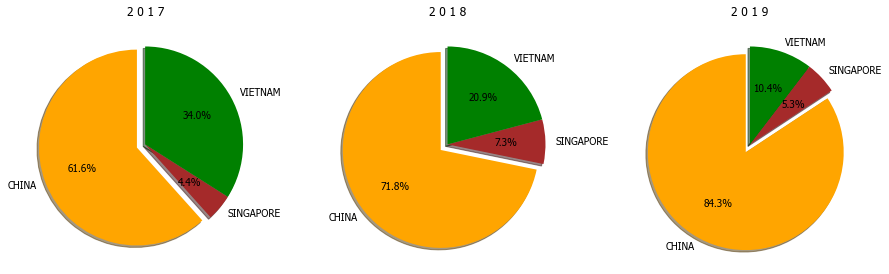

In [16]:
#ขั้นตอนต่อจะเป็นการสร้าง set ข้อมูลเพื่อใช้ในการสร้าง pie chart ของแต่ละปี
label = ['CHINA','SINGAPORE','VIETNAM']
sum_pie1 = [data_boat.loc['CN',2017][0],data_boat.loc['SG',2017][0],data_boat.loc['VN',2017][0]]#เป็นข้อมูลยอดขายปี2017ของ 3 ประเทศ
sum_pie2 = [data_boat.loc['CN',2018][0],data_boat.loc['SG',2018][0],data_boat.loc['VN',2018][0]]#เป็นข้อมูลยอดขายปี2018ของ 3 ประเทศ
sum_pie3 = [data_boat.loc['CN',2019][0],data_boat.loc['SG',2019][0],data_boat.loc['VN',2019][0]]#เป็นข้อมูลยอดขายปี2019ของ 3 ประเทศ
explode = (0.09, 0, 0 ) #ค่าทีใช้แบ่งแยกความห่างจากประเทศที่มีเปอรเซ็นเยอะสุดในแต่ละ pie chart

fig = plt.figure()
ax1 = fig.add_axes([0, 0, 1, 0.85], aspect=1) #และขั้นตอนนี้จะเป็นการกำหนด layout ของ pie chart
ax2 = fig.add_axes([0.7, 0, 1, 0.85], aspect=1)
ax3 = fig.add_axes([1.4, 0, 1, 0.85], aspect=1)
ax1.pie(sum_pie1,explode=explode,colors= ['orange','brown','green'],  labels=label, autopct='%1.1f%%',
        shadow=True, startangle= 90) #การพรอท pie chart ปี 2017
ax2.pie(sum_pie2,explode=explode,colors= ['orange','brown','green'],  labels=label, autopct='%1.1f%%',
        shadow=True, startangle= 90) #การพรอท pie chart ปี 2018
ax3.pie(sum_pie3,explode=explode,colors= ['orange','brown','green'],  labels=label, autopct='%1.1f%%',
        shadow=True, startangle= 90) #การพรอท pie chart ปี 2019
ax1.set_title('2 0 1 7')
ax2.set_title('2 0 1 8')
ax3.set_title('2 0 1 9')
plt.show()

จาก Pie Chart ด้านบน แสดงให้เห็นว่าประเทศที่ค้าขายผ่านทางเรือมากที่สุดคือประเทศจีน และในแต่ละปียอดค้าขายยังเพิ่มไม่ต่ำกว่า 10% นั่นแสดงให้ถึงการขยายตัวของประเทศจีนในด้านเศรษฐกิจ

### การแสดงสัดส่วนการค้าข้ามแดนผ่านทางบก
การแสดงผลด้านล่างจะเป็นการแสดงสัดส่วนการค้าข้ามแดน โดยผ่านทางบกของแต่ละปีและจะแสดงอยู่ในรูปแบบของเปอร์เซ็น
จะประกอบไปด้วยประเทศดังนี้

- CAMBODIA (KH)
- LAOS     (LA)
- MYANMAR  (MM)
- MALAYSIA (MY)

In [17]:
#เป็นการ plot กราฟเพื่อแสดงการค้าข้ามแดนผ่านทางบก โดยขั้นตอนแรกจะเริ่มจากการ filter เอาเฉพาะประเทศที่ค้าขายผ่านทางบก ซึ่งมี 4 ประเทศ
data_land = data_trade.loc[['KH','LA','MM','MY']].groupby(by=['country_code','year']).sum()
data_land = data_land/1000000  #จากนั้นทำการแปลงหน่วยให้เป็นหนึ่งล้าน
data_land

value_baht
country_code year               
KH           2017    1105.664718
             2018     878.355032
             2019    1517.631198
LA           2017    2220.624214
             2018    2236.178598
             2019    1764.955500
MM           2017  128782.926238
             2018  151000.404272
             2019  155446.542532
MY           2017    1462.025728
             2018    1449.986836
             2019     923.860872

In [18]:
#ขั้นตอนนี้จะเตรียมข้อมูลก่อนการ plot 
dic_land = dict() #โดยจะเริ่มจากการสร้าง dict ขึ้นมา
for i in range(len(data_land)):#และจะใช้ loop วนตามขนาดของ dataframe ก่อนหน้า ในการกำหนด key และvalueใน dict
    #ซึ่งจะกำหนด key โดยใช้ index ที่ i ซึ่งผลที่ได้ของ index ที่ i จะเป็นชื่อย่อประเทศของแต่ row 
#หลังจากได้ key เป็นชื่อประเทศแล้ว เราจะทำการกำหนดvalueของ key นั้น โดยใช้ .loc ในการ filter หาข้อมูลจาก index ที่ i หลังจากนั้นก็เข้าถึงข้อมูลของ
#column value_baht และดึงออกมา 3 ค่า ซึ่งผลที่ได้จะเป็น list ของข้อมูลปี2017-2019  
#ตัวอย่าง {'KH': array([1105.664718,  878.355032, 1517.631198])}
    dic_land[data_land.index[i][0]] = data_land.loc[data_land.index[i][0]].value_baht[0:3].values
dataframe_land = pd.DataFrame(data=dic_land, index=index) #่ต่อมานำข้อมูล dictที่เตรียมไว้มาสร้างเป็น dataframe
dataframe_land

KH           LA             MM           MY
2017  1105.664718  2220.624214  128782.926238  1462.025728
2018   878.355032  2236.178598  151000.404272  1449.986836
2019  1517.631198  1764.955500  155446.542532   923.860872

Text(0, 0.5, 'Y e a r')

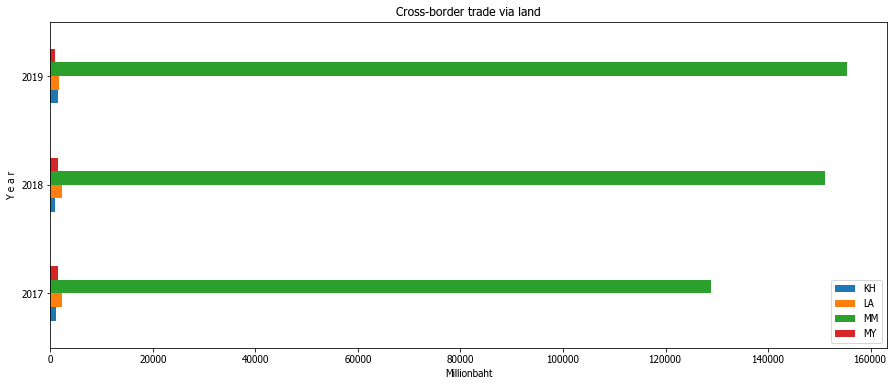

In [19]:
#ขั้นตอนต่อมาจะเป็นการ plot การค้าขายทางบกในแต่ละปี 
dataframe_land.plot( title = 'Cross-border trade via land',figsize=(15, 6) ,kind='barh')
plt.xlabel('Millionbaht')
plt.ylabel('Y e a r')

จากกราฟด้านบน แสดงให้ว่าประเทศเมียนมาเป็นประเทศที่มีการค้าขายเป็นอันดับ 1 เนื่องจากสินค้าที่ส่งออกนั่นเป็น ก๊าซธรรมชาติ ทำให้มีราคาสูงและเป็นสินค้าที่มีความต้องการสูง

เนื่องจากยอดเงินไหลเข้าออกจากประเทศเมียนมามีจำนวนที่สูงมาก จึงทำให้ไม่สามารถเข้าใจประเทศที่เหลือได้อย่างถูกต้อง จึงนำประเทศเมียนมาออกเพื่อดูเงินหมุนเวียนของประเทศที่เหลือ

Text(0, 0.5, 'Y e a r')

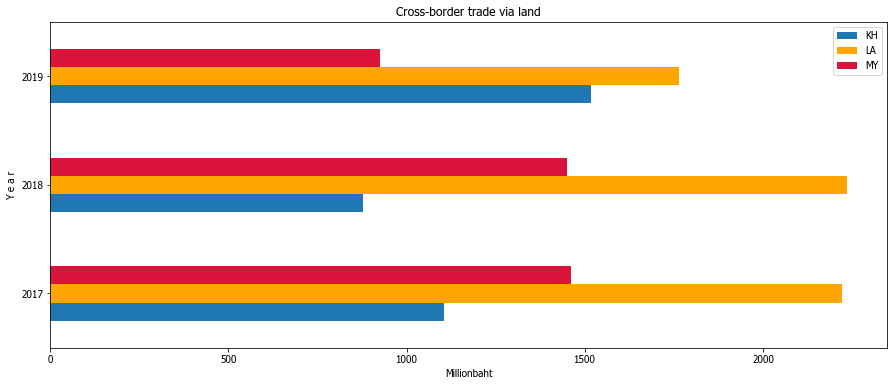

In [20]:
#ซึ่งขั้นตอนนี้จะทำเหมือนกับการ plot ก่อนหน้านี้ เพียงแต่ตัดประเทศเมียนมาออก เพราะมีจำนวนยอดเงินไหลเข้าออกที่สูงมากเกินไป
data_land = (data_trade.loc[['KH','LA','MY']].groupby(by=['country_code','year']).sum()/1000000)
dic_land = dict()
for i in range(len(data_land)):
    dic_land[data_land.index[i][0]] = data_land.loc[data_land.index[i][0]].value_baht[0:3].values
dic_land

dataframe_land = pd.DataFrame(data=dic_land, index=index)
dataframe_land.plot( title = 'Cross-border trade via land',figsize=(15, 6) ,kind='barh',color =['#1f77b4','orange','crimson'])
plt.xlabel('Millionbaht')
plt.ylabel('Y e a r')

จากกราฟแท่งด้านบน แสดงให้ถึงประเทศที่มีการค้าผ่านทางบกเป็นอันดับ 2 คือ ประเทศลาว  และประเทศที่มียอดขายเพิ่มมากสุดเมื่อเทียบกับปีก่อน ๆ คือประเทศกัมพูชา นั่นแสดงให้เห็นถึงการขยายตัวด้านเศรฐกิจทางการค้า

## วิเคราะห์ข้อมูลนำเข้าและส่งออก

### ข้อมูลนำเข้าและส่งออกผ่านทางเรือ
 จากกราฟด้านล่าง จะเป็นการแสดงข้อมูลนำเข้าและส่งออกของสินค้าผ่านทางเรือ โดยจะเปรียบเทียบแต่ละปีของแต่ละประเทศที่ทำการค้ากับประเทศไทย

In [21]:
#การ plot ข้อมูลนำเข้าและส่งออกทางเรือ ซึ่งจะแบ่งข้อมูลออกเป็น 2 ส่วน คือข้อมูลนำเข้า และส่งออก โดยขั้นตอนแรกจะเริ่มที่ข้อมูลนำเข้า
boat_ = ['CHINA', 'SINGAPORE', 'VIETNAM']
country_boat = ['CN','SG','VN']
#โดยจะเริ่ม filter ประเภทของการขนส่ง และ หลังจากนั้น filter ประเทศที่ทำการค้าขายผ่านทางเรือ ซึ่งมี 3ประเทศจากนั้นทำการค้า่ขาย
#ต่อมาทำการกรุ๊ปตามรหัสประเทศ ปี และ เดือน เพื่อง่ายต่อการเข้าถึง
data_im_boat = data_trade.loc[(data_trade.type ==  'import') & (data_trade.country_name_en.isin(boat_))]\
                .groupby(by=['country_code','year','month']).sum()/1000000 #ซึ่งต่อมาจะทำการแปลงหน่วยให้เป็นหนึ่งล้านบาท
#และในส่วนข้อมูลส่งออกจะทำเหมือนข้อมูลนำเข้า แต่เปลี่ยนเงื่อนไขจาก import to export
data_ex_boat = data_trade.loc[(data_trade.type ==  'export') & (data_trade.country_name_en\
.isin(boat_))].groupby(by=['country_code','year','month']).sum()/1000000
data_im_boat.head(12)

value_baht
country_code year month            
CN           2017 1        6.001596
                  2        1.396734
                  3        2.372894
                  4        4.727966
                  5        0.914796
                  6        1.613026
                  7        2.228908
                  8        1.724642
                  9        0.905670
                  10       2.035814
                  11       2.468812
                  12       1.916004

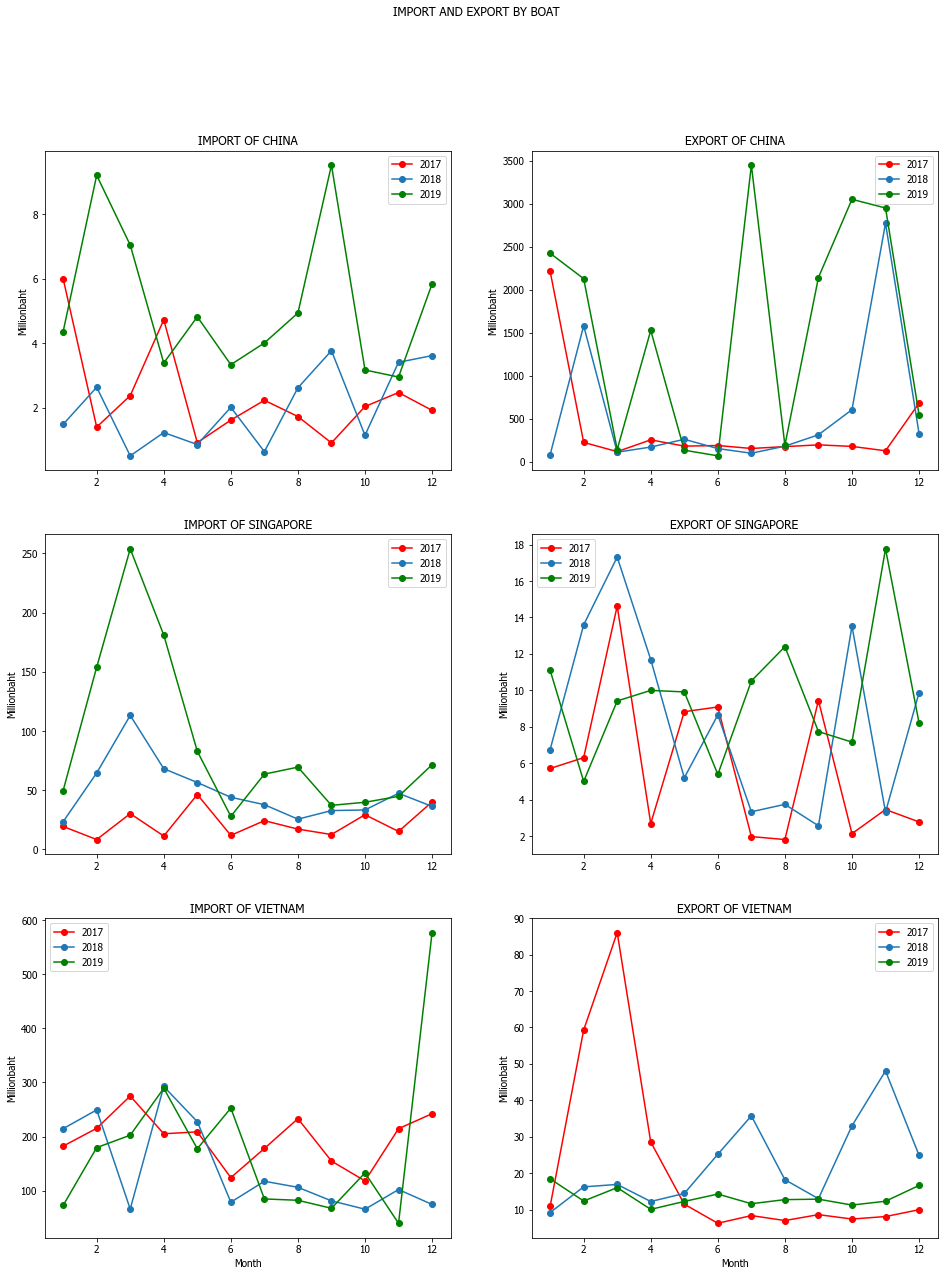

In [22]:
#ขั้นตอนต่อมา เป็นการนำข้อมูลที่เตรียมไว้มาใช้ในการ plot()
fig,a =  plt.subplots(nrows=3,ncols= 2,figsize=(16,20))
for i in range(3):#โดยจะทำการ loop 3 รอบ เพื่อใช้ในการพรอททั้ง 3 ประเทศ [Chaina,Singapore,Vietnam]
#โดยการ loop แต่ละครั้ง จะได้กราฟเปรียบเทียบ 3 ปี ของประเทศนั้นๆ 
    a[i][0].plot(data_im_boat.loc[country_boat[i],2017],'-ro')#country_boat[i] จะเป็นประเทศตาม index ที่ i
    a[i][0].plot(data_im_boat.loc[country_boat[i],2018],'-o')
    a[i][0].plot(data_im_boat.loc[country_boat[i],2019],'-go')
    a[i][0].set_title('IMPORT'+' OF '+boat_[i])
    a[2][0].set_xlabel("Month")
    a[i][0].set_ylabel("Millionbaht")
    a[i][0].legend(['2017','2018','2019'])
#เมื่อเราได้กราฟของแต่ละประเทศที่มีการนำเข้าสินค้าแล้ว
#ต่อมา loop ด้านล่างจะเป็นการ loop เพื่อพรอทข้อมูลส่งออก ซึ่งวิธีการสร้างจะเหมือนกับข้อมูลนำ เปลี่ยนแค่ dataset จาก data_im_boat to data_ex_boat
for i in range(3):
    a[i][1].plot(data_ex_boat.loc[country_boat[i],2017],'-ro')
    a[i][1].plot(data_ex_boat.loc[country_boat[i],2018],'-o')
    a[i][1].plot(data_ex_boat.loc[country_boat[i],2019],'-go')
    a[i][1].set_title('EXPORT'+' OF '+boat_[i])
    a[2][1].set_xlabel("Month")
    a[i][1].set_ylabel("Millionbaht")
    a[i][1].legend(['2017','2018','2019'])
plt.suptitle('IMPORT AND EXPORT BY BOAT')

plt.show() 

จากกราฟด้านบน ทำให้เห็นช่วงเวลาในการนำเข้าและส่งออกของประเทศที่ค้าขายผ่านทางเรือ

### ข้อมูลนำเข้าและส่งออกผ่านทางบก

Text(0.5, 0.98, 'IMPORT AND EXPORT BY LAND')

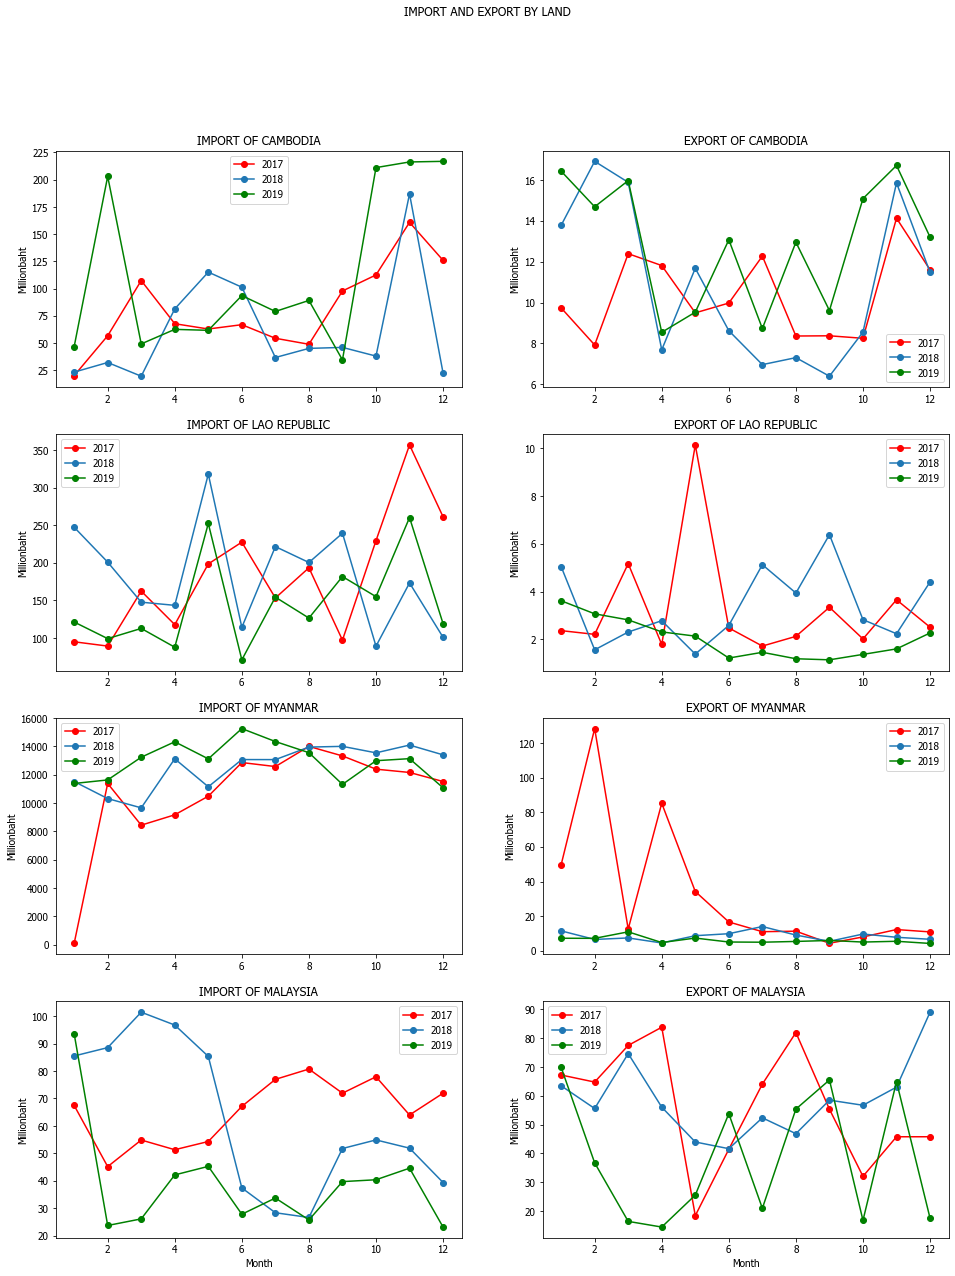

In [23]:
#ส่วนข้อมูลนำเข้าและส่งออกผ่านทางบก จะมีขั้นตอนการทำเหมือนกับ ผ่านทางเรือ ซึ่งเปลี่ยนเฉ่พ่าะชื่อประเทศ
land_ = ['CAMBODIA', 'LAO REPUBLIC','MYANMAR', 'MALAYSIA']
country_land = ['KH','LA','MM','MY']
data_im_land = data_trade.loc[(data_trade.type ==  'import') & (data_trade.country_name_en\
.isin(land_))].groupby(by=['country_code','year','month']).sum()/1000000
fig,a =  plt.subplots(nrows=4,ncols= 2,figsize=(16,20))

for i in range(4):
    a[i][0].plot(data_im_land.loc[country_land[i],2017],'-ro')
    a[i][0].plot(data_im_land.loc[country_land[i],2018],'-o')
    a[i][0].plot(data_im_land.loc[country_land[i],2019],'-go')
    a[i][0].set_title('IMPORT'+' OF '+land_[i])
    a[3][0].set_xlabel("Month")
    a[i][0].set_ylabel("Millionbaht")
    a[i][0].legend(['2017','2018','2019'])
    
data_ex_land = data_trade.loc[(data_trade.type == 'export') & (data_trade.country_name_en\
.isin(land_))].groupby(by=['country_code','year','month']).sum()/1000000
for i in range(4):
    a[i][1].plot(data_ex_land.loc[country_land[i],2017],'-ro')
    a[i][1].plot(data_ex_land.loc[country_land[i],2018],'-o')
    a[i][1].plot(data_ex_land.loc[country_land[i],2019],'-go')
    a[i][1].set_title('EXPORT'+' OF '+land_[i])
    a[3][1].set_xlabel("Month")
    a[i][1].set_ylabel("Millionbaht")
    a[i][1].legend(['2017','2018','2019'])
plt.suptitle('IMPORT AND EXPORT BY LAND')

จากกราฟด้านบน ทำให้เห็นช่วงเวลาในการนำเข้าและส่งออกของประเทศที่ค้าขายผ่านทางบก 

## วิเคราะห์ช่องทางหลักในการค้าขาย

In [24]:
#จะเป็นการ plot ความถี่ในการขนส่งต่อเดือนและเป็นข้อมูลรวมปี2017-2019 โดยขั้นตอนแรก
#จะเป็นการสร้างตารางขึ้นมา โดยใช้ pivot_table คือการสร้างตารางโดยการระบุ index  values และ column ของตาราง
data_frequent = pd.pivot_table(data_trade,values='value_baht',index=['province_name'],\
                               columns =['month'],aggfunc=len ,fill_value=0)# ซึ่งในการสร้างตารางเราได้กำหนด index คือ ชื่อจังหวัด
#กำหนดคอลัมน์เป็นเดือน ซึ่งมีทั้งหมด 12 เดือน และกำหนดค่าในคอลัมน์เป็น value_baht โดยจะระบุเป็นความถี่ ซึ่งใช้คำสั่ง agg = len 
#ส่วนจังไหนเป็นค่า nan ให้แทนด้วย 0
data_frequent

month             1    2    3    4    5    6    7    8    9    10   11   12
province_name                                                              
กาญจนบุรี          8   10   12   10   10   10   18   10   16   16   16   20
จันทบุรี          22   20   16   10   20   22   10   22   30   26   18   16
ตราด              70   66   74   64   60   62   74   64   66   66   56   48
ตาก              128  138  132  136  136  140  140  152  116  128  126  118
นครพนม            56   68   54   56   56   64   62   60   52   56   70   52
นราธิวาส           4    6    8    4    4    8    6    6    0    4    4    8
น่าน              18   20   18   20   24   20   18   26   18   24   26   28
บึงกาฬ             8    8    4    8    2    8    6    6    4    8    8   10
ประจวบคีรีขันธ์   12    8   14   14   16   16   22   16   18   16   16   22
มุกดาหาร         242  250  248  244  238  246  250  224  246  230  226  244
ยะลา               0    0    0    0    2    4    2    2    2    4    0    0
ระนอง             54   56   50   52   58   48   42   46   60   46   52   48
ศรีสะเกษ           6    6    8   10    8    8    8   12    8   12   10    8
สงขลา            584  568  574  576  560  562  558  570  570  576  574  560
สระแก้ว          138  144  132  150  142  146  148  142  140  136  160  164
สุรินทร์          10   14   16   12   16    8    6    8    4   10    2   10
หนองคาย           68   64   52   62   70   56   62   68   66   64   54   52
อุบลราชธานี       60   58   68   68   70   70   68   66   82   64   76   68
เชียงราย         162  148  176  158  168  162  166  162  170  170  164  184
เลย               20   20   16   18   18   16   12   16    6   14   14   10
แม่ฮ่องสอน        10    8    8    8    2    4    2    2    6   10    8   10

Text(0.5, 1.0, 'Number of trades per month')

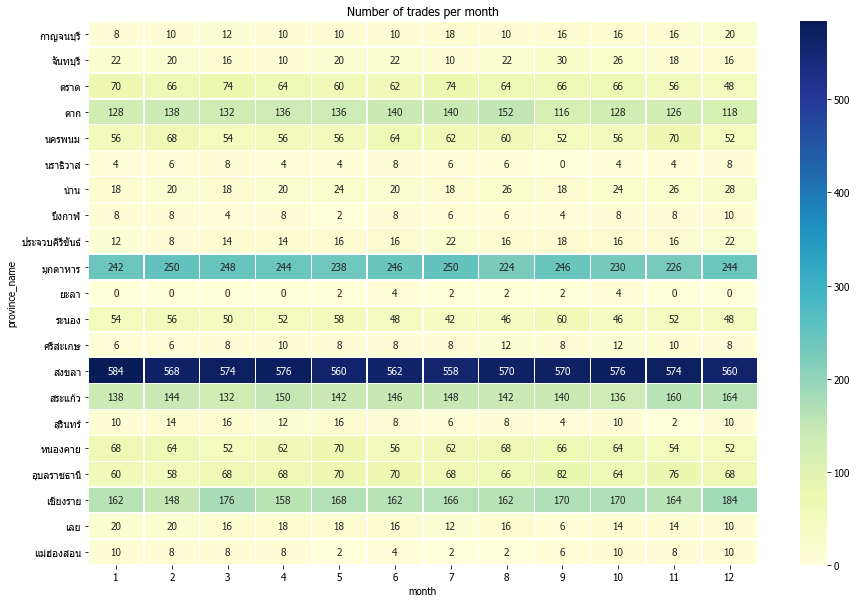

In [25]:
#ขั้นตอนต่อมา นำตาราง pivot ที่เตรียมไว้มา plot ในรูปแบบ heatmap
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(data_frequent, annot=True, fmt="d", linewidths=.5, ax=ax,cmap="YlGnBu")
plt.title('Number of trades per month')


จาก Heat Map ด้านบนทำให้ทราบถึงจำนวนครั้งในการค้าขายแต่ละเดือนและแต่ละจังหวัด  โดยจะบ่งบอกถึงช่องทางหลักในการนำเข้าและส่งออกของประเทศไทยที่ประเทศเพื่อนบ้านนิยมใช้ในการค้าขาย ซึ่งสามารถแบ่งเป็น 5 ช่องทางหลักๆ ด้วยกันได้แก่
- สงขลา   พื้นที่ส่วนใหญ่ของจังหวัดอยู่ติดกับชายฝั่งทะเลอ่าวไทยทำให้สะดวกต่อการขนส่ง โดยขนส่งผ่านทางเรือจึงนิยมใช้เป็นช่องทางในการค้าขายอันดับ 1
- มุกดาหาร พื้นที่เป็นจังหวัดชายแดน อยู่ในภาคตะวันออกเฉียงเหนือตอนบนของประเทศไทยซึ่งสะดวกต่อการค้าขายผ่านชายแดน
- เชียงราย  พื้นที่จังหวัดได้เปรียบ เนื่องจากติดกับประเทศเมียนมาและลาว ซึ่งเป็น 2 ประเทศที่ติดกับจีนและอินเดีย ทำให้ยังเป็นอีกช่องทางนึงในการค้าขายหลัก
- สระแก้ว   พื้นที่ตั้งอยู่ติดกับประเทศกัมพูชา ทำให้การค้าส่วนใหญ่จะการค้าระหว่างประเทศไทยกับกัมพูชา
- ตาก     พื้นที่อยู่ติดกับประเทศเมียนมา ซึ่งการค้าหลักๆ จะเป็นการค้าประเทศไทยกับเมียนมา


#### แหล่งอ้างอิง:
- http://kb.tsu.ac.th/jspui/bitstream/123456789/1025/1/article.pdf (สงขลา)
- https://www.prachachat.net/local-economy/news-411964 (มุกดาหาร)
- https://www.ditp.go.th/contents_attach/143649/143649.pdf (เชียงราย)
- https://www.ditp.go.th/contents_attach/80300/80300.pdf (สระแก้ว)
- https://www.prachachat.net/local-economy/news-368155 (ตาก)


ภาพด้านล่างนี้จะเป็นการแสดงความสัมพันธ์ระหว่างประเทศผู้ค้าขายกับจังหวัดหรือ ช่องทางในการขนส่ง  โดยจะบ่งบอกถึงจังหวัดที่แต่ละประเทศเลือกใช้ในการขนส่ง


In [26]:
#เป็นการพรอทแสดงความสัมพันธ์ของการขนส่ง โดยใช้ plotly scatter ในการ visualization 
fig = px.scatter(data_trade, y='province_name', x="country_name_en",color = 'country_name_en')# โดยกำหนด y คือ ชื่อจังหวัด
# x คือ ชื่อประเทศ

fig.show()

จากภาพ Scatter plot ด้านบนจะทำให้ทราบถึงช่องทางที่แต่ละประเทศเลือกใช้ในการขนส่งโดยผ่านจังหวัดต่าง ๆ ดังภาพ

## การวิเคราะห์ด่านในการขนส่ง
จะเป็นการแสดงด่านที่เป็นหัวใจหลักของ 5 จังหวัด ที่มีการค้าขายชุกชุมในประเทศไทยได้แก่
- สงขลา   
- มุกดาหาร 
- เชียงราย  
- สระแก้ว   
- ตาก    

In [27]:
#เป็นการสร้าง pie chart dashboard  โดยมีขั้นตอนดังนี้
province = ['สงขลา','มุกดาหาร','เชียงราย','สระแก้ว','ตาก']
df = data_trade[data_trade.province_name.isin(province)] #ขั้นตอนแรกกำหนด dataset ให้มีเฉพาะ 5 จังหวัด
fig = px.sunburst(df, path=['province_name', 'port_name'])#จากนั้นทำการ plot โดยเลือกจังหวัดเป็น main และ ด่านตามลำดับ
fig.show()


จาก Pie Chart Dashboard ด้านบน จะทำให้เราทราบด่านหลักๆ ของแต่ละจังหวัดที่เป็นหัวใจหลักของการขนในการทำการค้ากับไทย และแต่ละด่านยังแสดงความถี่ที่มีการขนส่งผ่านด่านนั้น ๆ

## วิเคราะห์สินค้าในการขนส่ง
การวิเคราะห์สินค้าที่ขนส่งผ่าน 5 จังหมด

In [28]:
#เป็นการแสดงสินค้าทั้งหมดที่ขนส่งผ่าน 5 จังหวัด
data_trade.product_name.value_counts()

กระจกนิรภัย กระจกรถยนต์                                    3704
กระจก แก้ว และผลิตภัณฑ์อื่น ๆ                              2452
กระดาษแข็ง                                                 1876
กระดาษ และผลิตภัณฑ์กระดาษอื่น ๆ                            1220
กาแฟ ชา เครื่องเทศ                                          952
                                                           ... 
กาแฟ                                                          2
เครื่องใช้บนโต๊ะอาหาร เครื่องครัว ทำด้วยเหล็ก เหล็กกล้า       2
เครื่องใช้บนโต๊ะอาหาร เครื่องครัว ทำด้วยพลาสติก               2
เครื่องคอมเพรสเซอร์ของเครื่องทำความเย็น                       2
เครื่องใช้และเครื่องตกแต่งภายในบ้านเรือนอื่น ๆ                2
Name: product_name, Length: 94, dtype: int64

### รวมกลุ่มประเภทของสินค้า
จากการแสดงจำนวนสินค้าทั้งหมดที่ขนส่งผ่าน 5 จังหวัด พบว่ายังมีประเภทหรือชื่อสินที่สามารถรวมกันได้ โดยจะทำการแก้ไขดังขั้นตอนด้านล่างนี้

In [29]:
#สร้างชุดข้อมูลขึ้นมาใหม่ โดยกำหนดให้มีเฉพาะ 5 จังหวัด
data_trade_th = data_trade[data_trade.province_name.isin(province)]
data_trade_th.head(3)

type                               port_name  \
country_code year month                                                   
CN           2017 1      import  รพท.มุกดาหารลานทอง ด่านศุลกากรมุกดาหาร   
                  1      import  รพท.มุกดาหารลานทอง ด่านศุลกากรมุกดาหาร   
                  1      import                 ด่านศุลกากรสะเดา (ศภ.4)   

                        province_name country_name_en  \
country_code year month                                 
CN           2017 1          มุกดาหาร           CHINA   
                  1          มุกดาหาร           CHINA   
                  1             สงขลา           CHINA   

                                      country_name_th  \
country_code year month                                 
CN           2017 1      สาธารณรัฐประชาชนจีน (ตอนใต้)   
                  1      สาธารณรัฐประชาชนจีน (ตอนใต้)   
                  1      สาธารณรัฐประชาชนจีน (ตอนใต้)   

                                          product_name  value_baht  
country_code year month                                             
CN           2017 1            กรอบและโครงสำหรับแว่นตา      2570.0  
                  1            กรอบและโครงสำหรับแว่นตา     12989.0  
                  1      กระจก แก้ว และผลิตภัณฑ์อื่น ๆ      2696.0

#### รวมกลุ่มของสินค้าที่เป็น กระดาษ

In [30]:
#ทำการรวมสินค้าที่เป็นกระดาษ โดยเริ่มจากสร้าง list รายชื่อสินค้ากระดาษทั้งหมด
paper = data_trade_th[data_trade_th.product_name.str.contains('กระดาษ')].product_name.unique()
paper

array(['กระดาษ และผลิตภัณฑ์กระดาษอื่น ๆ', 'กระดาษคราฟท์', 'กระดาษชำระ',
       'กระดาษและกระดาษแข็ง', 'กระดาษพิมพ์เขียน',
       'กระดาษชำระ กระดาษเช็ดหน้า กระดาษอนามัย',
       'กระดาษและผลิตภัณฑ์กระดาษอื่นๆ',
       'กระดาษใช้สำหรับเขียน พิมพ์ หรือวัตถุประสงค์อื่นทางกราฟิก',
       'กระดาษแข็ง', 'กระดาษหนังสือพิมพ์'], dtype=object)

In [31]:
#จากนั้นทำการเปลี่ยนค่าข้อมูลของคอลัมน์ product_name ที่มีค่าอยู่ใน list ให้ค่าเป็น กระดาษ
data_trade_th.loc[data_trade_th['product_name'].isin(paper) , 'product_name'] = 'กระดาษ' 
data_trade_th.product_name.value_counts().head(3)#แสดงผลลัพธ์

C:\Users\NPL-PC\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



กระดาษ                           4614
กระจกนิรภัย กระจกรถยนต์          2254
กระจก แก้ว และผลิตภัณฑ์อื่น ๆ    1730
Name: product_name, dtype: int64

#### รวมกลุ่มของสินค้าที่เป็น เครื่องใช้ภายในครัว

In [32]:
kitchen = data_trade_th[data_trade_th.product_name.str.contains('เครื่องใช้')].product_name.unique()
kitchen #list รายชื่อสินค้า

array(['เครื่องใช้บนโต๊ะอาหาร เครื่องครัว ทำด้วยพลาสติก',
       'เครื่องใช้บนโต๊ะอาหาร เครื่องครัว ทำด้วยโลหะมีค่า',
       'เครื่องใช้บนโต๊ะอาหาร เครื่องครัว ทำด้วยเหล็ก เหล็กกล้า',
       'เครื่องใช้ทำด้วยไม้',
       'เครื่องใช้บนโต๊ะอาหาร เครื่องครัว ทำด้วยอลูมิเนียม',
       'เครื่องใช้ในครัวและโต๊ะอาหาร', 'เครื่องใช้เบ็ดเตล็ดอื่น ๆ',
       'เครื่องใช้และเครื่องตกแต่งภายในบ้านเรือนอื่น ๆ'], dtype=object)

In [33]:
data_trade_th.loc[data_trade_th['product_name'].isin(kitchen) , 'product_name'] = 'เครื่องใช้และเครื่องตกแต่งภายในบ้านเรือนอื่น ๆ'#เปลี่ยนค่า
data_trade_th[data_trade_th.product_name == 'เครื่องใช้และเครื่องตกแต่งภายในบ้านเรือนอื่น ๆ'].head(2)#แสดงผลลัพธ์

type                   port_name province_name  \
country_code year month                                                     
CN           2017 1      export  ด่านศุลกากรเชียงของ (ศภ.3)      เชียงราย   
                  1      export  ด่านศุลกากรเชียงของ (ศภ.3)      เชียงราย   

                        country_name_en               country_name_th  \
country_code year month                                                 
CN           2017 1               CHINA  สาธารณรัฐประชาชนจีน (ตอนใต้)   
                  1               CHINA  สาธารณรัฐประชาชนจีน (ตอนใต้)   

                                                           product_name  \
country_code year month                                                   
CN           2017 1      เครื่องใช้และเครื่องตกแต่งภายในบ้านเรือนอื่น ๆ   
                  1      เครื่องใช้และเครื่องตกแต่งภายในบ้านเรือนอื่น ๆ   

                         value_baht  
country_code year month              
CN           2017 1         38880.0  
                  1         19800.0

#### รวมกลุ่มของสินค้าประเภท เครื่องจักร

In [34]:
machine  = data_trade_th[data_trade_th.product_name.str.contains('เครื่องจักร')].product_name.unique()
machine # list รายชื่อสินค้า

array(['เครื่องจักรกลอื่น ๆ และส่วนประกอบ',
       'เครื่องจักรใช้ในอุตสาหกรรมและส่วนประกอบ',
       'เครื่องจักรใช้ในการแปรรูปไม้  และส่วนประกอบ',
       'เครื่องจักรที่ใช้ในการก่อสร้างและส่วนประกอบ',
       'เครื่องจักรใช้ในการเกษตร',
       'เครื่องจักรที่ใช้ในอุตสาหกรรมและส่วนประกอบ',
       'เครื่องจักรไฟฟ้าใช้ในการโทรคมนาคมและการสื่อสาร',
       'เครื่องจักรไฟฟ้าใช้ในอุตสาหกรรม',
       'เครื่องจักรไฟฟ้าอื่นๆและส่วนประกอบ',
       'เครื่องจักรไฟฟ้าใช้ในสำนักงาน'], dtype=object)

In [35]:
data_trade_th.loc[data_trade_th['product_name'].isin(machine) , 'product_name'] = 'เครื่องจักรกลอื่น ๆ และส่วนประกอบ'#เปลียนค่า
data_trade_th.product_name.value_counts().head(5)#แสดงผลลัพธ์

C:\Users\NPL-PC\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



กระดาษ                               4614
กระจกนิรภัย กระจกรถยนต์              2254
กระจก แก้ว และผลิตภัณฑ์อื่น ๆ        1730
เครื่องจักรกลอื่น ๆ และส่วนประกอบ     876
เครื่องคอมพิวเตอร์และอุปกรณ์          600
Name: product_name, dtype: int64

#### รวมกลุ่มสินค้าประเภท  กระเป๋า

In [36]:
bag = data_trade_th[data_trade_th.product_name.str.contains('กระเป๋า')].product_name.unique()
bag # list รายชื่อสินค้า

array(['กระเป๋า', 'กระเป๋าถือและกระเป๋าอื่น ๆ', 'กระเป๋าถือ',
       'กระเป๋าใส่เศษสตางค์', 'กระเป๋าเดินทาง'], dtype=object)

In [37]:
data_trade_th.loc[data_trade_th['product_name'].isin(bag) , 'product_name'] = 'กระเป๋าถือและกระเป๋าอื่น ๆ'#เปลียนค่า
data_trade_th.product_name.value_counts().head(4)#แสดงผลลัพธ์

กระดาษ                           4614
กระจกนิรภัย กระจกรถยนต์          2254
กระจก แก้ว และผลิตภัณฑ์อื่น ๆ    1730
กระเป๋าถือและกระเป๋าอื่น ๆ       1244
Name: product_name, dtype: int64

#### รวมกลุ่มสินค้าประเภท สินค้าเบ็ตเตล็ด

In [38]:
bettlet = data_trade_th[data_trade_th.product_name.str.contains('ของ')].product_name.unique()
bettlet #list รายชื่อ

array(['ของเล่น', 'โกโก้และของปรุงแต่ง', 'ของชำร่วยและเครื่องประดับ',
       'ของใช้ในเทศกาลอี่น ๆ', 'ของเบ็ดเตล็ดอื่น ๆ ทำด้วยโลหะสามัญ',
       'ของเล่นที่มีล้อ', 'ของเล่นอื่น ๆ', 'ของอื่นๆที่ทำด้วยอลูมิเนียม'],
      dtype=object)

In [39]:
data_trade_th.loc[data_trade_th['product_name'].isin(bettlet) , 'product_name'] = 'สินค้าเบ็ตเตล็ดและอื่น' #เปลี่ยนค่า
data_trade_th.product_name.value_counts().head(7)#แสดงผลลัพธ์

กระดาษ                               4614
กระจกนิรภัย กระจกรถยนต์              2254
กระจก แก้ว และผลิตภัณฑ์อื่น ๆ        1730
กระเป๋าถือและกระเป๋าอื่น ๆ           1244
เครื่องจักรกลอื่น ๆ และส่วนประกอบ     876
เครื่องคอมพิวเตอร์และอุปกรณ์          600
สินค้าเบ็ตเตล็ดและอื่น                408
Name: product_name, dtype: int64

#### รวมกลุ่มสินค้าประเภท เคมีภัณฑ์

In [40]:
chemical = data_trade_th[data_trade_th.product_name.str.contains('เคมี')].product_name.unique()
chemical #list รายชื่อ

array(['เคมีปรุงแต่งใช้ในการถ่ายรูป', 'เคมีภัณฑ์อนินทรีย์',
       'เคมีภัณฑ์อินทรีย์', 'เคมีภัณฑ์อื่น ๆ', 'เคมีภัณฑ์เบ็ดเตล็ด'],
      dtype=object)

In [41]:
data_trade_th.loc[data_trade_th['product_name'].isin(chemical) , 'product_name'] = 'เคมีภัณฑ์อื่น ๆ'#เปลี่ยนค่า
data_trade_th.product_name.value_counts().head(9)#แสดงผลลัพธ์

กระดาษ                               4614
กระจกนิรภัย กระจกรถยนต์              2254
กระจก แก้ว และผลิตภัณฑ์อื่น ๆ        1730
กระเป๋าถือและกระเป๋าอื่น ๆ           1244
เครื่องจักรกลอื่น ๆ และส่วนประกอบ     876
เครื่องคอมพิวเตอร์และอุปกรณ์          600
สินค้าเบ็ตเตล็ดและอื่น                408
กาแฟ ชา เครื่องเทศ                    398
เคมีภัณฑ์อื่น ๆ                       370
Name: product_name, dtype: int64

#### รวมกลุ่มสินค้าประเภท ข้าวโพด

In [42]:
corn = data_trade_th[data_trade_th.product_name.str.contains('ข้าวโพด')].product_name.unique()
corn #list รายชื่อ

array(['ข้าวโพด', 'ข้าวโพดหวาน', 'ข้าวโพดอ่อน'], dtype=object)

In [43]:
data_trade_th.loc[data_trade_th['product_name'].isin(corn) , 'product_name'] = 'ข้าวโพด'#เปลี่ยนค่า

#### รวมกลุ่มสินค้าประเภท กล้องถ่ายรูป

In [44]:
camera = data_trade_th[data_trade_th.product_name.str.contains('กล้อง')].product_name.unique()
camera #list รายชื่อ

array(['กล้องถ่ายภาพยนต์และส่วนประกอบ', 'กล้องถ่ายรูป',
       'กล้องถ่ายรูปและส่วนประกอบ'], dtype=object)

In [45]:
data_trade_th.loc[data_trade_th['product_name'].isin(camera) , 'product_name'] = 'กล้องถ่ายรูปและส่วนประกอบ' #เปลี่ยนค่า

#### รวมกลุ่มสินค้าประเภท  กุ้ง

In [46]:
prawn = data_trade_th[data_trade_th.product_name.str.contains('กุ้ง')].product_name.unique()
prawn #list รายชื่อ

array(['กุ้ง', 'กุ้งสด แช่เย็น แช่แข็ง'], dtype=object)

In [47]:
data_trade_th.loc[data_trade_th['product_name'].isin(prawn) , 'product_name'] = 'กุ้งสด แช่เย็น แช่แข็ง' #เปลี่ยนค่า

#### รวมกลุ่มสินค้าประเภท เครื่องดื่ม

In [48]:
drink = data_trade_th[data_trade_th.product_name.str.contains('เครื่องดื่ม')].product_name.unique()
drink #list ชื่อ

array(['เครื่องดื่มที่ไม่มีแอลกอฮอส์', 'เครื่องดื่มที่มีแอลกอฮอส์'],
      dtype=object)

In [49]:
data_trade_th.loc[data_trade_th['product_name'].isin(drink) , 'product_name'] = 'เครื่องดื่ม' #เปลี่ยนค่า

#### รวมกลุ่มสินค้าประเภท คอมพิวเตอร์

In [50]:
computer = data_trade_th[data_trade_th.product_name.str.contains('คอม')].product_name.unique()
computer #list รายชื่อ

array(['เครื่องคอมพิวเตอร์และอุปกรณ์',
       'เครื่องคอมพิวเตอร์ อุปกรณ์และส่วนประกอบ'], dtype=object)

In [51]:
data_trade_th.loc[data_trade_th['product_name'].isin(computer) , 'product_name'] = 'เครื่องคอมพิวเตอร์และอุปกรณ์' #เปลี่ยนค่า

#### รวมลุ่มสินค้าประเภท น้ำมันสัตว์

In [52]:
oil = data_trade_th[data_trade_th.product_name.str.contains('ไขมัน')].product_name.unique()
oil #list รายชื่อ

array(['ไขมันและน้ำมันจากสัตว์', 'ไขมันและน้ำมันจากพืชและสัตว์อื่น ๆ'],
      dtype=object)

In [53]:
data_trade_th.loc[data_trade_th['product_name'].isin(oil) , 'product_name'] = 'น้ำมันสัตว์' #เปลี่ยนค่า

#### รวมกลุ่มสินค้าประเภท กระเบื่อง

In [54]:
tile = data_trade_th[data_trade_th.product_name.str.contains('กระเบื้อง')].product_name.unique()
tile #list รายชื่อ

array(['กระเบื้องปูพื้นและปิดผนัง', 'กระเบื้องปูพื้น ปิดผนังและโมเสก'],
      dtype=object)

In [55]:
data_trade_th.loc[data_trade_th['product_name'].isin(oil) , 'product_name'] = 'กระเบื้องปูพื้นและปิดผนัง' #เปลี่ยนค่า

In [56]:
#ทำการนับความถี่ในการค้าขายของแต่ละสินค้า จากนั้นทำการตัดสินค้าที่มีความถี่น้อยกว่า 20 
rate_more_ = data_trade_th.product_name.value_counts().head(-10).index.tolist()
rate_more_

['กระดาษ',
 'กระจกนิรภัย กระจกรถยนต์',
 'กระจก แก้ว และผลิตภัณฑ์อื่น ๆ',
 'กระเป๋าถือและกระเป๋าอื่น ๆ',
 'เครื่องจักรกลอื่น ๆ และส่วนประกอบ',
 'เครื่องคอมพิวเตอร์และอุปกรณ์',
 'สินค้าเบ็ตเตล็ดและอื่น',
 'กาแฟ ชา เครื่องเทศ',
 'เคมีภัณฑ์อื่น ๆ',
 'กุ้งสด แช่เย็น แช่แข็ง',
 'ก๊อก วาวล์และส่วนประกอบ',
 'กล่องหีบที่ทำด้วยพลาสติก',
 'ข้าว',
 'กรอบรูปไม้',
 'กรอบและโครงสำหรับแว่นตา',
 'คอนแทกเลนซ์และเลนส์',
 'กล้วยไม้',
 'กบ',
 'กระเบื้องปูพื้นและปิดผนัง',
 'ขนมปังกรอบ',
 'เครื่องใช้และเครื่องตกแต่งภายในบ้านเรือนอื่น ๆ',
 'กล้องถ่ายรูปและส่วนประกอบ',
 'ไก่',
 'ข้าวโพด',
 'น้ำมันสัตว์',
 'เครื่องกีฬาสำหรับเล่นกลางแจ้ง (สกี แบดมินตัน กอล์ฟ  เทนนิส ฯลฯ)',
 'กุญแจสายยู',
 'เครื่องแกงสำเร็จรูป',
 'เครื่องดื่ม',
 'กระติกสูญญากาศและส่วนประกอบ']

In [57]:
#ขั้นตอนต่อมาคือการสร้าง dataframe ที่ตัดสินค้าที่มีความถี่น้อยกว่า 20 ออก
rate_more_ = data_trade_th.loc[data_trade_th['product_name'].isin(rate_more_)]
rate_more_.head()

type                               port_name  \
country_code year month                                                   
CN           2017 1      import  รพท.มุกดาหารลานทอง ด่านศุลกากรมุกดาหาร   
                  1      import  รพท.มุกดาหารลานทอง ด่านศุลกากรมุกดาหาร   
                  1      import                 ด่านศุลกากรสะเดา (ศภ.4)   
                  1      import  รพท.มุกดาหารลานทอง ด่านศุลกากรมุกดาหาร   
                  1      import                 ด่านศุลกากรสะเดา (ศภ.4)   

                        province_name country_name_en  \
country_code year month                                 
CN           2017 1          มุกดาหาร           CHINA   
                  1          มุกดาหาร           CHINA   
                  1             สงขลา           CHINA   
                  1          มุกดาหาร           CHINA   
                  1             สงขลา           CHINA   

                                      country_name_th  \
country_code year month                                 
CN           2017 1      สาธารณรัฐประชาชนจีน (ตอนใต้)   
                  1      สาธารณรัฐประชาชนจีน (ตอนใต้)   
                  1      สาธารณรัฐประชาชนจีน (ตอนใต้)   
                  1      สาธารณรัฐประชาชนจีน (ตอนใต้)   
                  1      สาธารณรัฐประชาชนจีน (ตอนใต้)   

                                          product_name  value_baht  
country_code year month                                             
CN           2017 1            กรอบและโครงสำหรับแว่นตา      2570.0  
                  1            กรอบและโครงสำหรับแว่นตา     12989.0  
                  1      กระจก แก้ว และผลิตภัณฑ์อื่น ๆ      2696.0  
                  1      กระจก แก้ว และผลิตภัณฑ์อื่น ๆ      2843.0  
                  1      กระจก แก้ว และผลิตภัณฑ์อื่น ๆ      8209.0

In [58]:
#จากนั้นทำการพรอท scatter plot 
fig = px.scatter(rate_more_,y="product_name", x="province_name", color="country_name_en",width =950 ,height = 900)
fig.update_traces(marker=dict(size=12,\
                  line=dict(width=2,\
                  color='DarkSlateGrey')),\
                  selector=dict(mode='markers'))
fig.show()
                 

จาก scatter plot ด้านบน ทำให้ทราบถึงรายระเอียดข้อมูลดังนี้
- **มุกดาหาร** &emsp;&emsp;สินค้าส่วนใหญ่เป็นประเภทอาหารและวัสดุต่างๆ โดยใช้ขนส่งกับ ประเทศลาว และ เวียดนาม
- **สงขลา**  &emsp;&emsp;&emsp;สินค้าส่วนใหญ่เป็นประเภทวัสดุอุปกรณ์ต่าง ๆ โดยใช้ขนส่งกับ ประเทศมาเลเซีย จีน  และเวียดนาม
- **เชียงราย** &emsp;&emsp;สินค้าส่วนใหญ่เป็นเป็นประเภทอาหารและวัสดุ โดยใช้ขนส่งกับ ประเทศเมียนมา  จีน และลาว
- **ตาก**   &emsp;&emsp;&emsp;&emsp;&nbsp;สินค้าส่วนใหญ่เป็นประเภทกระจกและเคมีภัณฑ์ โดยใช้ขนส่งกับ ประเทศเมียนมา และ จีน
- **สระแก้ว** &emsp;&emsp;&ensp;สินค้าส่วนใหญ่เป็นประเภทวัสดุและเครื่องใช้ โดยใช้ขนส่งกับ ประเทศจีนและ เวียดนาม

#### การแสดงมูลค่าสินค้าหลักๆ ที่ใช้ในการค้าขาย

In [59]:
#โดยขั้นตอนแรกจะเริ่มจากการ กรุ๊ปตามชื่อสินค้า จากนั้นทำการแปลงหน่วยให้เป็นล้านบาท
product_ = data_trade_th.groupby(by='product_name').sum()/10000000
product_

value_baht
product_name                                                   
กบ                                                     2.431488
กรอบรูปไม้                                             2.298588
กรอบและโครงสำหรับแว่นตา                                3.253237
กระจก แก้ว และผลิตภัณฑ์อื่น ๆ                        174.339119
กระจกนิรภัย กระจกรถยนต์                              115.398239
กระดาษ                                               422.431492
กระติกสูญญากาศและส่วนประกอบ                            0.024127
กระสอบ                                                 0.000129
กระเบื้องปูพื้น ปิดผนังและโมเสก                        0.027055
กระเบื้องปูพื้นและปิดผนัง                              1.222761
กระเป๋าถือและกระเป๋าอื่น ๆ                            16.165967
กล่องหีบที่ทำด้วยพลาสติก                              23.311197
กล้วยไม้                                             112.348850
กล้องถ่ายรูปและส่วนประกอบ                              0.377010
กาแฟ ชา เครื่องเทศ                                    73.822297
กุญแจสายยู                                             0.009331
กุ้งสด แช่เย็น แช่แข็ง                                26.106787
ก๊อก วาวล์และส่วนประกอบ                                2.266528
ขนมปังกรอบ                                             3.715801
ข้าว                                                 504.751126
ข้าวโพด                                                4.736610
ครั่ง                                                  0.607629
คอนแทกเลนซ์และเลนส์                                  260.807593
น้ำมันสัตว์                                           20.186923
สินค้าเบ็ตเตล็ดและอื่น                                21.554764
เคมีภัณฑ์อื่น ๆ                                      291.303048
เครื่องกังหันไอพ่นและกังหันอื่น ๆ                      1.248306
เครื่องกีฬาสำหรับเล่นกลางแจ้ง (สกี แบดมินตัน กอ...     0.265780
เครื่องกีฬาและเครื่องเล่นเกมสำหรับเล่นในห้อง (บ...     0.293535
เครื่องคอมพิวเตอร์และอุปกรณ์                        2437.493804
เครื่องจักรกลอื่น ๆ และส่วนประกอบ                    242.627489
เครื่องฉายและส่วนประกอบ                                0.003200
เครื่องดนตรีและส่วนประกอบ                              0.000750
เครื่องดื่ม                                            0.421457
เครื่องแกงสำเร็จรูป                                    1.459881
เครื่องแก้วใช้บนโต๊ะอาหาร ในครัว                       0.007972
เครื่องแต่งกายและเข็มขัด                               0.341720
เครื่องใช้และเครื่องตกแต่งภายในบ้านเรือนอื่น ๆ         3.485826
แก้วและกระจกอื่นๆ                                      0.095765
ไก่                                                   77.503054

Text(0.5, 0, 'ล้านบาท')

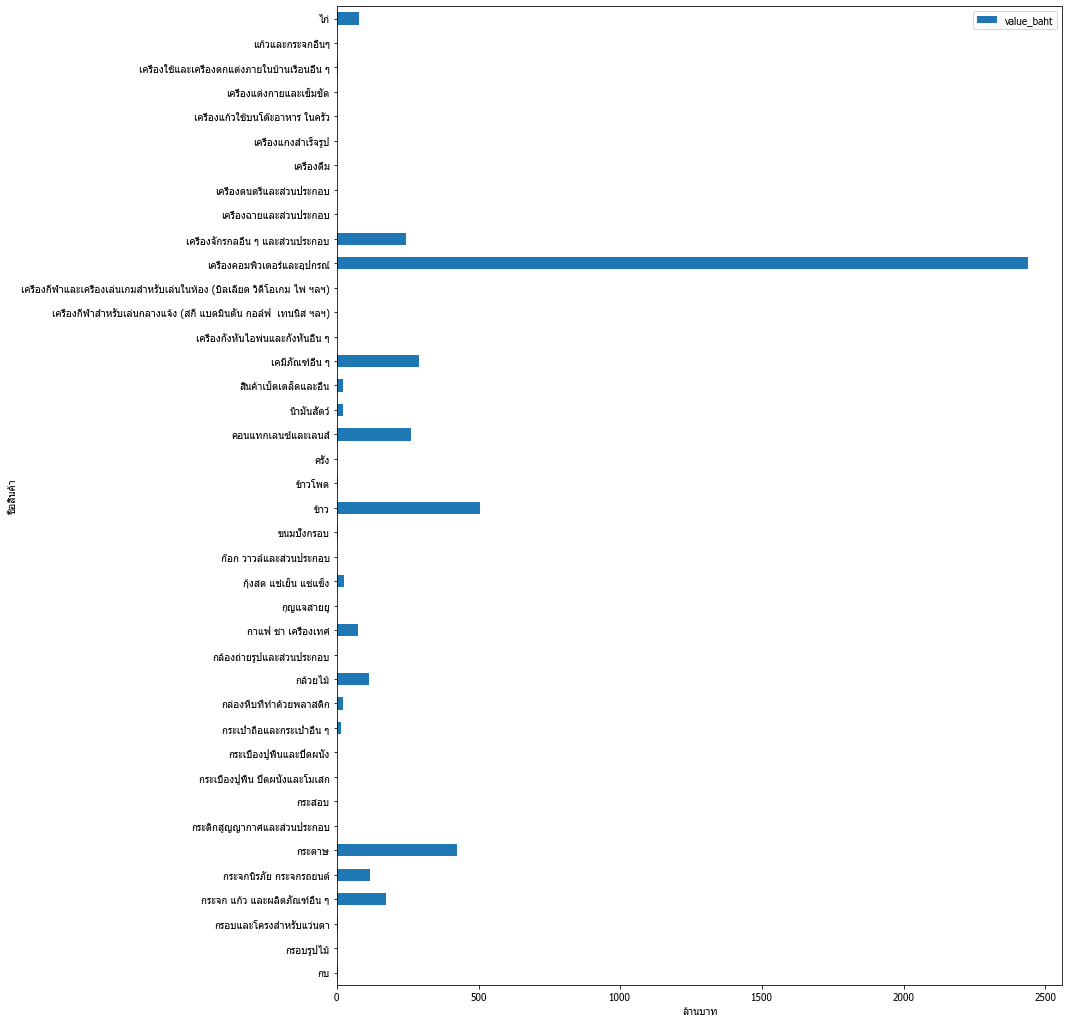

In [60]:
#ทำการ plot มูลค้าสินค้า
product_.plot(kind='barh',figsize=(13,18))
plt.ylabel('ชื่อสินค้า')
plt.xlabel('ล้านบาท')

จากการกราฟ จะแสดงให้เห็นถึงมูลค่าของสินค้าแต่ละชนิดของ 5 จังหวัด โดยสินค้าที่มีมูลสูงสุดคือ เครื่องคอมพิวเตอร์และอุปกรณ์

# Conclusion

ใน 3 ปีที่ผ่านมาตั้งแต่ปี 2017-2019 พบว่าปี 2019 นั้นกระแสเงินหมุนเวียนเข้าออกประเทศไทยมากทีสุด โดยจำนวนเงินส่วนใหญ่ที่หมุนเวียนมาจากสินค้านำเข้า จากนั้นได้ทำการสรวจลงไปในระดับประเทศจึงได้ทราบว่า 2 ประเทศเพื่อนที่มีอิทธิพลในการค้าของประเทศไทย ซึ่งได้แก่
 1. **ประเทศจีน**  เป็นประเทศที่มีการค้าขายผ่านทางทะเลกับไทยมากที่สุด  โดยตั้งปี 2018-2019 ประเทศจีนมียอดขายเพิ่มขึ้นมากว่า 10 % จากยอดขายทั้งหมด และในการขนส่งส่วนใหญ่ประเทศจีนจะเลือกช่องทางหรือจังหวัดที่ติดกับทะเลและติดกับประเทศลาว เช่น มุกดาหาร สงขลา เชียงราย เป็นต้น ซึ่งสินค้าที่ใช้ในการค้าขายส่วนใหญ่จะเป็นอาหารและเครื่องใช้ต่าง ๆ ในการขนส่ง 2 ปีที่ผ่านมาของจีนพบว่าทุกๆ เดือนกันยายนจะมียอดขายนำเข้าสูงสุด และ ส่งออกสูงสุดเดือนกรกฏาคม 
 2. **ประเทศเมียนมา** เป็นประเทศที่มีการค้าขายผ่านทางบกมากที่สุด  เนื่องจากสินค้าส่วนหลักเป็นก๊าสธรรมชาติที่เป็นสินค้าหลักที่ประเทศไทยต้องการ ส่วนในเรื่องการส่งออกประเทศไทยยังทำได้ไม่ดี เพราะ 2 ปีที่ผ่านมาตั้งแต่ปี 2018-2019 ยอดขายค่อนข้างต่ำกว่า 2017 และช่องทางที่ประเทศเลือกใช้ในการขนส่งจะเป็นจังหวัดที่ติดกับประเทศลาว เช่นจังหวัดตาก
 
ในการค้าขายกับประเทศเพื่อนบ้านประเทศไทยจะมีช่องทางที่ใช้ในการขนส่งหลักๆ 5 ช่องทาง  โดยใน 5 ช่องทางที่กล่าวถึงนี้ล้วนแล้วเป็นช่องทางที่ประเทศเพื่อนบ้านนิยมใช้เป็นช่องทางหลักในการขนส่ง เนื่องจากทุกช่องทางที่กล่าวถึงมีการขนส่งผ่านช่องทางนั้นๆ  ไม่ต่ำกว่า 100 ครั้งต่อเดือน และมากสุดคือ 500 ครั้งต่อเดือน ซึ่ง 5 ช่องทางหลัก ๆ ได้แก่
1. **สงขลา**  ขนส่งผ่านด่านศุลการกรสะเดา  และ ด่านศุลกากรปาดังเบซาร์ โดยจะใช้ขนส่งกับประเทศ จีน
2. **มุกดาหาร** ขนส่งผ่านด่านศุลกากรมุกดาหาร และ รพท. มุกดาหารลานทอง โดยจะใช้ขนส่งกับประเทศ ลาว เวียดนาม 
3. **ตาก**   ขนส่งผ่านศุลกากรแม่สอด  และ ด่านพรมแดนแม่สอด โดยจะใช้ขนส่งกับประเทศ เมียนม มาเลเซีย เวียดนาม จีน
4. **เชียงราย** ขนส่งผ่านด่านศุลกากรเชียงใหม่ และ ด่านศุลกากรแม่สาย โดยจะใช้ขนส่งกับประเทศ เมียนมา จีน ลาว 
5. **สระแก้ว** ขนส่งผ่านด่านศุลกากรอรัญประเทศ โดยจะใช้ขนส่งกับประเทศ กัมพูชา เวียดนาม


ในการวิเคราะห์สำหรับอนาคตข้อมูลควรมี latitude longitude หรือ จำนวนของสินค้านั้นๆ  เพื่อทำให้มุมมองการแสดงผลได้มากขึ้น